<a href="https://colab.research.google.com/github/rklepov/hse-cs-ml-2018-2019/blob/master/05-NN/05-nlp/02/Fasttext_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://study.mokoron.com/

https://elibrary.ru/item.asp?id=20399632

In [1]:
!wget 'https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0' -O positive.csv -q
!wget 'https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv?dl=0' -O negative.csv -q

!ls -hAlF {pos,neg}*

-rw-r--r-- 1 root root 24M Apr 27 20:38 negative.csv
-rw-r--r-- 1 root root 26M Apr 27 20:38 positive.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
positive = pd.read_csv('positive.csv',header=None,encoding='utf-8',delimiter=';')

In [0]:
negative = pd.read_csv('negative.csv',header=None,encoding='utf-8',delimiter=';')

In [5]:
positive.shape,negative.shape

((114911, 12), (111923, 12))

In [0]:
positive=positive[[positive.columns[3]]]
negative=negative[[negative.columns[3]]]

In [0]:
positive['target']=1
negative['target']=0

In [0]:
positive.columns=['text','target']
negative.columns=['text','target']

In [9]:
positive.head(100500).tail(5)

,text,target
100495,@abbrikoc дадада - теряемся во времени и прост...,1
100496,RT @Humourofday: Праздник начался еще вчера......,1
100497,Осталось найти человека который мне всё или ча...,1
100498,омооо как же это прекрасно *О* ангелочки прям)...,1
100499,Несколько моих бывших одноклассниц уже успели ...,1


In [0]:
full_set = pd.concat([positive, negative])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [0]:
x_train,x_test,y_train,y_test = train_test_split(full_set['text'],full_set.target.values,test_size=0.2,shuffle=True,random_state=2121)

In [0]:
clf = make_pipeline(TfidfVectorizer(ngram_range=(1,2)),MultinomialNB())
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [14]:
accuracy_score(y_test,preds)

0.7739546366301496

## Теперь опробуем на этих же данных простейшую сеть с предобученными ембедингами

In [0]:
# !apt install aria2

# !aria2c http://files.deeppavlov.ai/embeddings/ft_native_300_ru_twitter_nltk_word_tokenize.vec

[Downloading Datasets into Google Drive via Google Colab](https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166 "Step-by-step guide to use Google Drive in Google Colab for data science projects")

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [17]:
!head -5556 ft_native_300_ru_twitter_nltk_word_tokenize.vec | tail -n 1

доказать 0.16437 0.17093 -0.45873 -0.13372 0.33921 0.073384 0.16106 -0.020289 0.55512 0.13569 0.66571 0.14449 -0.72102 0.046202 -0.03181 -0.25013 0.092327 -0.37635 -0.60747 -0.29679 0.37077 -0.41515 -0.79684 0.21183 -0.52803 -0.29348 0.34107 0.44457 -0.45287 1.0067 0.028712 0.25436 0.45406 -0.37329 -0.20181 0.18764 0.26402 -0.21803 0.31609 -0.63936 0.092026 -0.4672 -0.59221 -0.073394 0.0089288 -0.70681 0.49093 0.4402 -0.28053 -0.55103 -0.093367 -0.20847 0.39514 0.60883 0.10735 0.27393 0.53548 -0.11827 -0.10455 -0.17514 0.16237 0.10441 0.36413 0.2952 0.27381 -0.33683 -0.22376 -0.25788 0.70338 0.31202 -0.0044773 -0.42418 -0.31247 0.078487 -0.05382 0.46329 0.50851 0.47951 -0.3126 0.20554 -0.015126 -0.53476 -0.13691 -0.066212 0.41248 -0.14656 0.82359 0.93749 -0.10254 -0.46864 -0.10698 -0.094619 0.36313 -0.5299 -0.20802 -0.90869 -0.28698 0.45536 0.54621 -0.679 


In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding
from tqdm import tqdm_notebook

Using TensorFlow backend.


In [19]:
f = open('ft_native_300_ru_twitter_nltk_word_tokenize.vec')
embedding_values = {}
for line in tqdm_notebook(f):
    value = line.replace('\n','').split(' ')
    word = value[0]
    coef = np.array(value[1:-1],dtype = 'float32')
    embedding_values[word]=coef

In [20]:
len(embedding_values['A'])

100

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(full_set['text'])
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 291376 unique tokens.


[How does Tokenizer work? #7551](https://github.com/keras-team/keras/issues/7551 "#7551")

[Using Tokenizer with num_words #8092](https://github.com/keras-team/keras/issues/8092 "#8092")

In [22]:
type(word_index), len(word_index), np.random.choice(list(word_index.keys()), 5)

(dict, 291376, array(['херачили', 'hiwupant', 'втф', 'пожрать', 'bkqjvw5jcz'],
       dtype='<U136'))

In [23]:
(type(sequences_train), len(sequences_train)), x_train.shape

((list, 181467), (181467,))

In [24]:
[ tokenizer.index_word[x] for x in sequences_train[np.random.randint(len(sequences_train))] ]

['смотрю',
 'видео',
 'с',
 '30',
 'летия',
 'europe',
 'джоуи',
 'до',
 'сих',
 'пор',
 'в',
 'форме',
 'хоть',
 'и',
 'голос',
 'немного',
 'подсел',
 'а',
 'джон',
 'все',
 'так',
 'же',
 'круто']

In [25]:
lower=True
embedding_matrix = np.zeros((len(word_index)+1, 100),dtype=np.float32)
for word, i in tqdm_notebook(word_index.items()):
    if lower:
        word = word.lower()
    try:
        embedding_vector = embedding_values[word]
    except:
        embedding_vector = embedding_values["unknown"]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
embedding_matrix.shape

(291377, 100)

In [0]:
import numpy as np
np.random.seed(1337) 

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Embedding, SpatialDropout1D
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional
from keras.regularizers import l2
from keras.constraints import maxnorm
from keras.optimizers import RMSprop

# max_features = 20000
maxlen = 40  
batch_size = 256 

print('Build model...')
model = Sequential()
model.add(Embedding(
    len(word_index)+1,
    100,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False
))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(GRU(32)))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-3,clipnorm=3,clipvalue=3),
              metrics=['accuracy'])

X_train = sequence.pad_sequences(sequences_train, maxlen=maxlen)
X_test = sequence.pad_sequences(sequences_test, maxlen=maxlen)

In [0]:
def plot_history(hist):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    def plot_ax(ax, hist, title, train, val, loc='best'):
        last_epoch = len(hist[train])
        ax.plot(1 + np.arange(last_epoch), hist[train])
        ax.plot(1 + np.arange(last_epoch), hist[val])
        
        ax.axvline(x=last_epoch, color='r', linestyle=':')
        bottom, top = ax.get_ylim()
        height = top - bottom
        ymid = bottom + height / 2
        ax.annotate(f'{last_epoch}', xy=(last_epoch, ymid))
        
        val_last = hist[val][last_epoch-1]
        ax.axhline(y=val_last, color='g', linestyle=':')
        left, right = ax.get_xlim()
        y2 = [top - height / 3, bottom + height / 3][bool(val_last < ymid)]
        ax.annotate(f'{val_last:.4f}', xy=(last_epoch, val_last), 
                    xytext=(last_epoch - (last_epoch - left) / 4, y2),
                    size = 14,
                    arrowprops=dict(arrowstyle='->', 
                                    connectionstyle=f'arc3,rad={.3*[1, -1][bool(val_last < ymid)]:.1f}'))

        ax.set_title(title)
        ax.set_ylabel(train)
        ax.set_xlabel('epoch')
        ax.set_xticks(np.arange(0, last_epoch, 5))
        ax.legend(['train', 'val'], loc=loc)
        ax.grid()

    plot_ax(ax[0], hist, 'model loss', 'loss', 'val_loss')
    plot_ax(ax[1], hist, 'model accuracy', 'acc', 'val_acc')

In [0]:
print('Train...')
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=25, validation_data=(X_test, y_test))

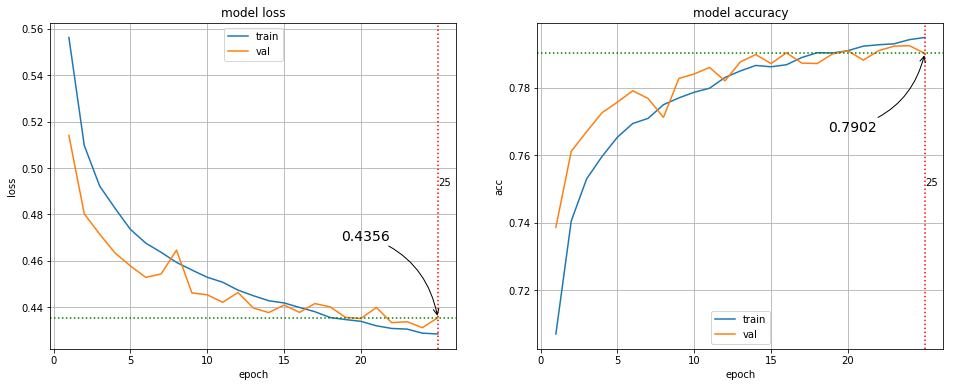

In [29]:
plot_history(history.history)

In [30]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

45367/45367 [==============================] - 9s 195us/step
Test score: 0.4355711069578091
Test accuracy: 0.7901558401835987


## _Усложнённая сеть c эмбеддингами_


In [0]:
# Классический вариант для кэгла
# x = L.SpatialDropout1D(0.2)(x)
# x = L.Bidirectional(L.CuDNNLSTM(64, return_sequences=True))(x)

# avg_pool1 = L.GlobalAveragePooling1D()(x)
# max_pool1 = L.GlobalMaxPooling1D()(x)

# x = L.concatenate([att,avg_pool1, max_pool1])

# preds = L.Dense(1, activation='sigmoid')(x)

https://github.com/PavelOstyakov/toxic/blob/master/toxic/model.py

In [0]:
from keras import layers as L
from keras.models import Model

def get_model2(embedding_matrix, input_length=maxlen):

    input_layer = L.Input(shape=(input_length,))

    embedding_layer = L.Embedding(
        embedding_matrix.shape[0],
        embedding_matrix.shape[1],
        weights=[embedding_matrix],
        trainable=False)(input_layer)

    x = L.SpatialDropout1D(0.2)(embedding_layer)
    x = L.Bidirectional(L.CuDNNLSTM(64, return_sequences=True))(x)

    avg_pool1 = L.GlobalAveragePooling1D()(x)
    max_pool1 = L.GlobalMaxPooling1D()(x)

    x = L.concatenate([avg_pool1, max_pool1])

    output_layer = L.Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=1e-3,clipnorm=3,clipvalue=3),
                  metrics=['accuracy'])

    return model    

In [0]:
model2 = get_model2(embedding_matrix)

print('Train...')
history = model2.fit(X_train, y_train, batch_size=batch_size, epochs=25, validation_data=(X_test, y_test))

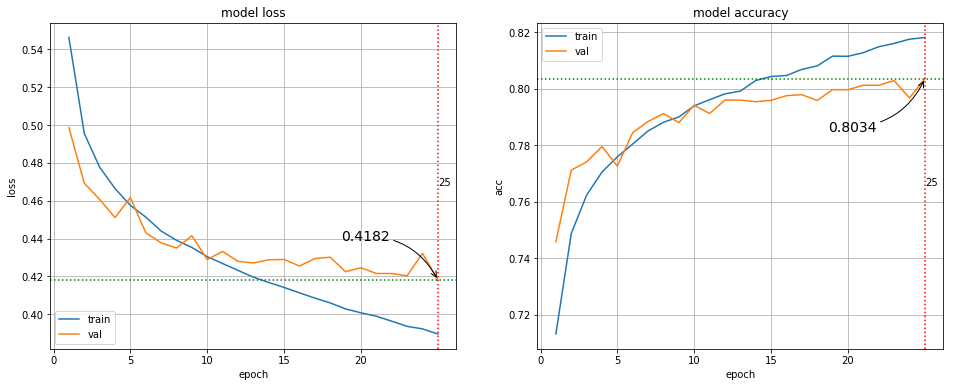

In [34]:
plot_history(history.history)

In [35]:
score, acc = model2.evaluate(X_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

45367/45367 [==============================] - 1s 17us/step
Test score: 0.41820025545721407
Test accuracy: 0.8034474397414046
